In [ ]:
### IMPORTAMOS LIBRERIAS

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    silhouette_score
)

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [33]:
# LECTURA DE DATOS.

gym_df = pd.read_csv('/Users/d.leon/Desktop/TRIPLETEN/PROYECTO 13/gym_churn_us.csv')

In [34]:
# PRIMERAS VISTAS

print("Dimensiones:", gym_df.shape)
print("Columnas:", gym_df.columns.tolist())
gym_df.head()

Dimensiones: (4000, 14)
Columnas: ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn']


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [35]:
# TIPOS Y NULOS
print("Tipos de datos:\n", gym_df.dtypes)
print("\n% de nulos por columna:")
print((gym_df.isna().mean()*100).round(2).sort_values(ascending=False))


Tipos de datos:
 gender                                 int64
Near_Location                          int64
Partner                                int64
Promo_friends                          int64
Phone                                  int64
Contract_period                        int64
Group_visits                           int64
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                float64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                  int64
dtype: object

% de nulos por columna:
gender                               0.0
Near_Location                        0.0
Partner                              0.0
Promo_friends                        0.0
Phone                                0.0
Contract_period                      0.0
Group_visits                         0.0
Age                        

Conteo de Churn:
 Churn
0    2939
1    1061
Name: count, dtype: int64

Proporción de Churn:
 Churn
0    0.7348
1    0.2652
Name: proportion, dtype: float64


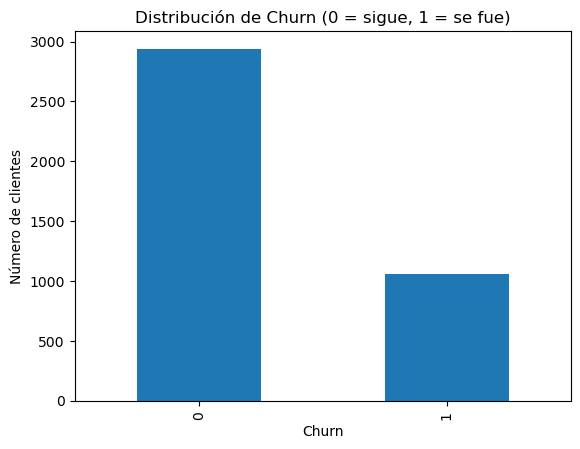

In [36]:
# DISTRIBUCION DE LA VARIABLE OBJETIVO

print("Conteo de Churn:\n", gym_df["Churn"].value_counts())
print("\nProporción de Churn:\n", gym_df["Churn"].value_counts(normalize=True).round(4))

# Gráfico simple
gym_df["Churn"].value_counts().plot(kind="bar")
plt.title("Distribución de Churn (0 = sigue, 1 = se fue)")
plt.xlabel("Churn")
plt.ylabel("Número de clientes")
plt.show()


In [37]:
# ESTADISTICAS DESCRIPTIVAS

desc = gym_df.describe(include="all").T
desc


,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [38]:
# COMPARATIVAS POR CHURN
# Media de cada variable por grupo (0 = no churn, 1 = churn)
group_means = gym_df.groupby("Churn").mean(numeric_only=True).T.sort_values(by=1, ascending=False)
group_means


Churn,0,1
Avg_additional_charges_total,158.445715,115.082899
Age,29.976523,26.989632
Contract_period,5.747193,1.728558
Month_to_end_contract,5.283089,1.662582
Avg_class_frequency_total,2.024876,1.474995
Avg_class_frequency_current_month,2.027882,1.044546
Lifetime,4.711807,0.990575
Phone,0.903709,0.902922
Near_Location,0.873086,0.768143
gender,0.510037,0.510839


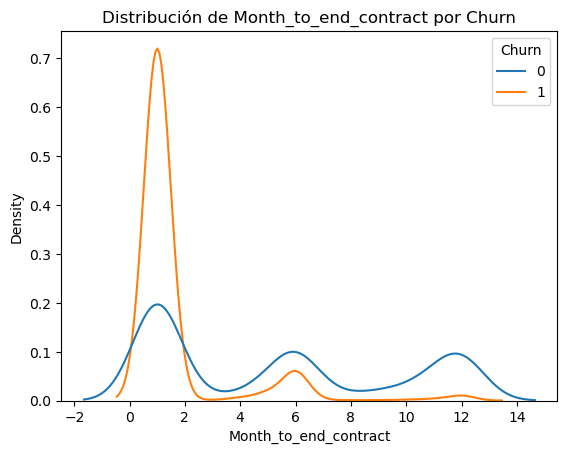

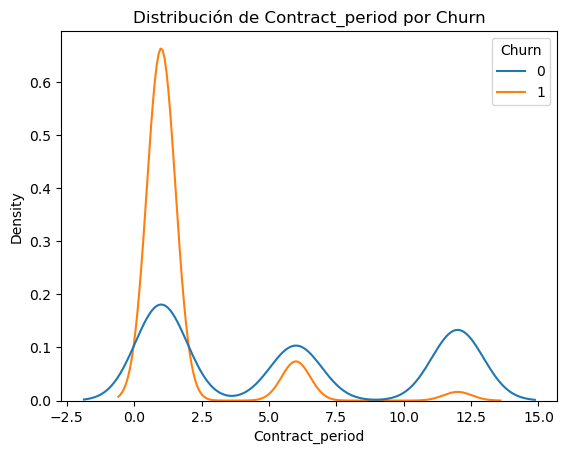

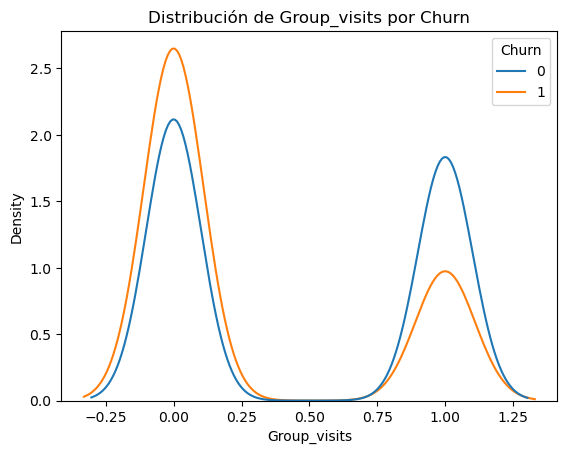

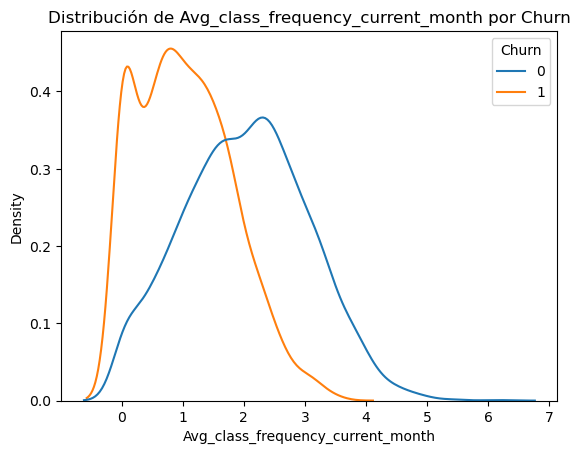

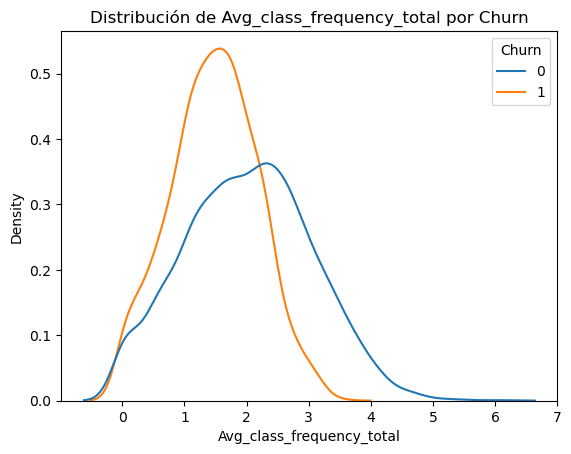

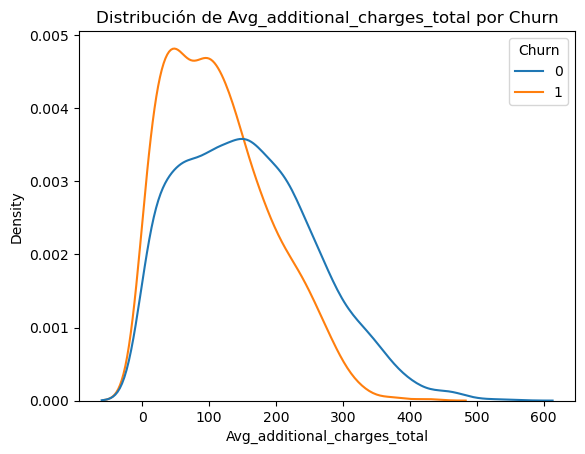

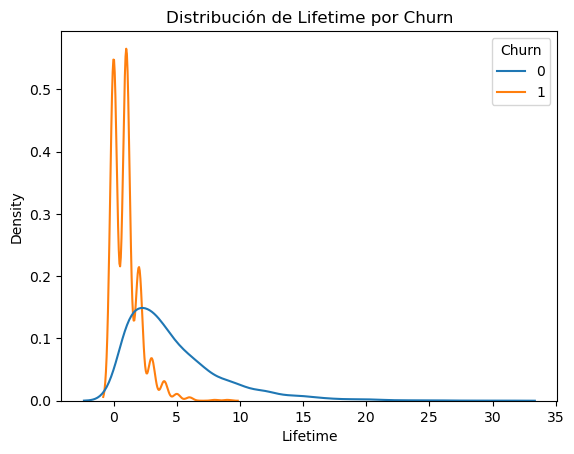

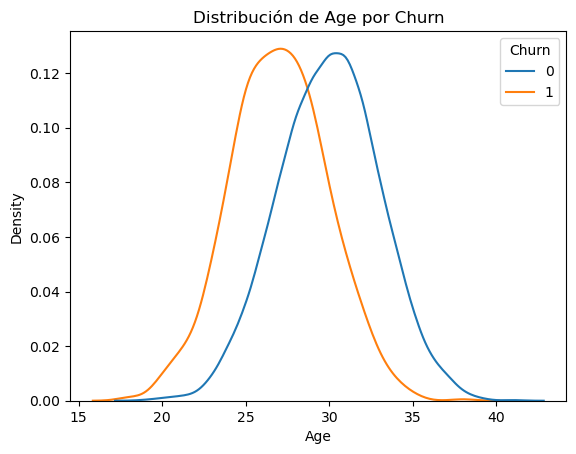

In [39]:
# HISTOGRAMAS/KDE POR CHURN (VARIABLES MAS RELEVANTES)

num_cols = gym_df.select_dtypes(include=[np.number]).columns.drop("Churn")

cols_to_plot = [
    c for c in [
        "Month_to_end_contract","Contract_period","Group_visits",
        "Avg_class_frequency_current_month","Avg_class_frequency_total",
        "Avg_additional_charges_total","Lifetime","Age"
    ] if c in num_cols
]

for col in cols_to_plot:
    plt.figure()
    sns.kdeplot(data=gym_df, x=col, hue="Churn", common_norm=False)
    plt.title(f"Distribución de {col} por Churn")
    plt.show()


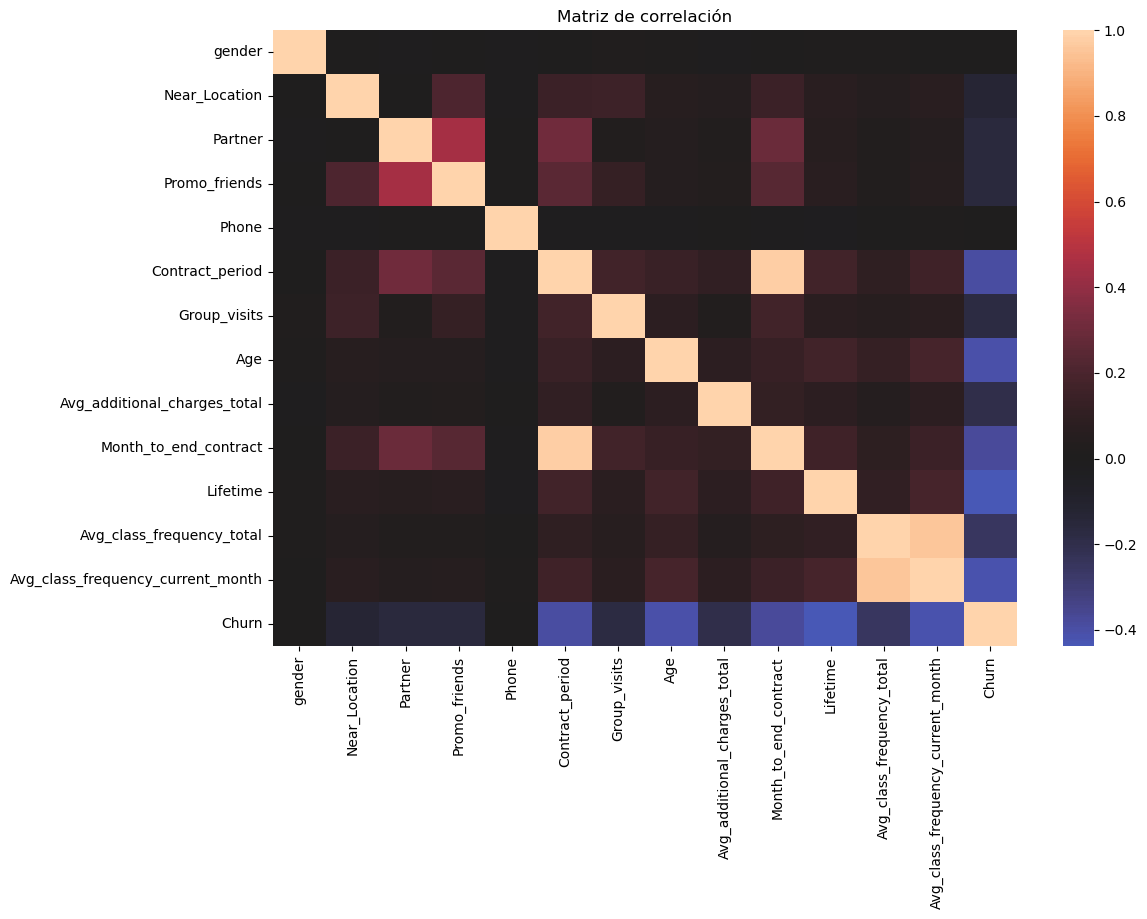

In [40]:
# MATRIZ DE CO-RELACION (NUMERICAS)

plt.figure(figsize=(12,8))
corr = gym_df.select_dtypes(include="number").corr()
sns.heatmap(corr, center=0)
plt.title("Matriz de correlación")
plt.show()


# PASO 3.- CONSTRUCCIÓN DE MODELO.

In [41]:
# DEFINIR X, Y. & HACER UN SPLIT

# 1) Target y features
TARGET = "Churn"
assert TARGET in gym_df.columns, f"No encuentro la columna objetivo {TARGET!r}"
y = gym_df[TARGET].astype(int)
X = gym_df.drop(columns=[TARGET]).copy()

# 2) Normalización mínima de tipos (por si hay bools)
for c in X.columns:
    if X[c].dtype == "bool":
        X[c] = X[c].astype(int)

# 3) Detectar tipos para el preprocesamiento del siguiente bloque
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

print(f"Número de columnas numéricas: {len(num_cols)}")
print(f"Número de columnas categóricas: {len(cat_cols)}")
print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

# 4) Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("\nShapes ->",
      f"X_train: {X_train.shape}, X_test: {X_test.shape},",
      f"y_train: {y_train.shape}, y_test: {y_test.shape}")

# 5) Chequeo rápido de balance por clase
def dist(y):
    vc = y.value_counts(normalize=True).sort_index()
    return {int(k): round(float(v), 4) for k, v in vc.items()}

print("Distribución Churn (train):", dist(y_train))
print("Distribución Churn (test): ", dist(y_test))


Número de columnas numéricas: 13
Número de columnas categóricas: 0
Numéricas: ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
Categóricas: []

Shapes -> X_train: (3200, 13), X_test: (800, 13), y_train: (3200,), y_test: (800,)
Distribución Churn (train): {0: 0.7347, 1: 0.2653}
Distribución Churn (test):  {0: 0.735, 1: 0.265}


In [42]:
# PROCESAMIENTO

# Preprocesamiento: 
# 1) Imputación de nulos para las variables numéricas con la mediana
# 2) Estandarización de las variables numéricas (StandardScaler)
# 3) Imputación de nulos y OneHotEncoding para las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        # Para variables numéricas: imputación + escalado
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_cols),
        
        # Para variables categóricas: imputación + codificación OneHot
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ]
)

# Verificando el preprocesador (una muestra de cómo quedarán las transformaciones)
X_train_transformed = preprocessor.fit_transform(X_train)
print("\nForma después del preprocesamiento:", X_train_transformed.shape)



Forma después del preprocesamiento: (3200, 13)


In [43]:
# MODDELO 1.- LOGISTIC REGRESSION (ENTRENAR Y EVALUAR)

# Pipeline: preprocesamiento (del Bloque 3.2) + modelo
logreg_pipe = Pipeline([
    ("pre", preprocessor),
    ("clf", LogisticRegression(max_iter=2000, random_state=42))
])

# Entrenamiento
logreg_pipe.fit(X_train, y_train)

# Predicción
y_pred_lr = logreg_pipe.predict(X_test)

# Métricas
acc_lr  = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, zero_division=0)
rec_lr  = recall_score(y_test, y_pred_lr, zero_division=0)
cm_lr   = confusion_matrix(y_test, y_pred_lr)

print("=== Logistic Regression ===")
print(f"Accuracy:  {acc_lr:.4f}")
print(f"Precision: {prec_lr:.4f}")
print(f"Recall:    {rec_lr:.4f}")
print("\nMatriz de confusión:")
print(cm_lr)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, digits=4, zero_division=0))


=== Logistic Regression ===
Accuracy:  0.9250
Precision: 0.8800
Recall:    0.8302

Matriz de confusión:
[[564  24]
 [ 36 176]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9400    0.9592    0.9495       588
           1     0.8800    0.8302    0.8544       212

    accuracy                         0.9250       800
   macro avg     0.9100    0.8947    0.9019       800
weighted avg     0.9241    0.9250    0.9243       800



In [44]:
# RANDOM FOREST

# Pipeline: preprocesamiento (del Bloque 3.2) + modelo
rf_pipe = Pipeline([
    ("pre", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=2,
        n_jobs=-1,
        random_state=42
        # , class_weight="balanced_subsample"  # <- si tu recall es muy bajo, puedes activar esto
    ))
])

# Entrenamiento
rf_pipe.fit(X_train, y_train)

# Predicción
y_pred_rf = rf_pipe.predict(X_test)

# Métricas
acc_rf  = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, zero_division=0)
rec_rf  = recall_score(y_test, y_pred_rf, zero_division=0)
cm_rf   = confusion_matrix(y_test, y_pred_rf)

print("=== Random Forest ===")
print(f"Accuracy:  {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall:    {rec_rf:.4f}")
print("\nMatriz de confusión:")
print(cm_rf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, digits=4, zero_division=0))


=== Random Forest ===
Accuracy:  0.9275
Precision: 0.8889
Recall:    0.8302

Matriz de confusión:
[[566  22]
 [ 36 176]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9402    0.9626    0.9513       588
           1     0.8889    0.8302    0.8585       212

    accuracy                         0.9275       800
   macro avg     0.9145    0.8964    0.9049       800
weighted avg     0.9266    0.9275    0.9267       800



In [45]:
# COMPARACION DE MODDELOS


# Resultados en formato diccionario para ambos modelos
results = {
    'Logistic Regression': {
        'Accuracy': acc_lr,
        'Precision': prec_lr,
        'Recall': rec_lr,
        'Confusion Matrix': cm_lr
    },
    'Random Forest': {
        'Accuracy': acc_rf,
        'Precision': prec_rf,
        'Recall': rec_rf,
        'Confusion Matrix': cm_rf
    }
}

# Mostrar resultados de la comparación
for model, metrics in results.items():
    print(f"\n=== {model} ===")
    print(f"Accuracy:  {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall:    {metrics['Recall']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_lr if model == 'Logistic Regression' else y_pred_rf, digits=4, zero_division=0))



=== Logistic Regression ===
Accuracy:  0.9250
Precision: 0.8800
Recall:    0.8302
Confusion Matrix:
[[564  24]
 [ 36 176]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9400    0.9592    0.9495       588
           1     0.8800    0.8302    0.8544       212

    accuracy                         0.9250       800
   macro avg     0.9100    0.8947    0.9019       800
weighted avg     0.9241    0.9250    0.9243       800


=== Random Forest ===
Accuracy:  0.9275
Precision: 0.8889
Recall:    0.8302
Confusion Matrix:
[[566  22]
 [ 36 176]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9402    0.9626    0.9513       588
           1     0.8889    0.8302    0.8585       212

    accuracy                         0.9275       800
   macro avg     0.9145    0.8964    0.9049       800
weighted avg     0.9266    0.9275    0.9267       800



# PASO 4.- CLUSTERING

In [46]:
# Clustering K-Means

# Variables para clustering (eliminando la columna objetivo Churn)
X_clu = gym_df.drop(columns=[TARGET]).copy()

# Convertir booleanos/Yes/No a 0/1 si fuera necesario
for c in X_clu.columns:
    if X_clu[c].dtype == 'bool':
        X_clu[c] = X_clu[c].astype(int)
    if X_clu[c].dtype == 'object':
        vals = X_clu[c].dropna().unique()
        if len(vals) == 2:
            X_clu[c] = (X_clu[c] == vals[0]).astype(int)

# Estandarización de los datos
scaler = StandardScaler()
X_clu_sc = scaler.fit_transform(X_clu)

# Aplicar K-Means con 5 clusters (puedes cambiar k si quieres explorar más)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_clu_sc)

# Asignar los clusters al dataframe original
gym_df["cluster"] = clusters

# Ver el resultado
gym_df[['cluster', TARGET]].groupby("cluster").mean()


,Churn
cluster,
0,0.587685
1,0.285940
2,0.013932
3,0.042279
4,0.105145


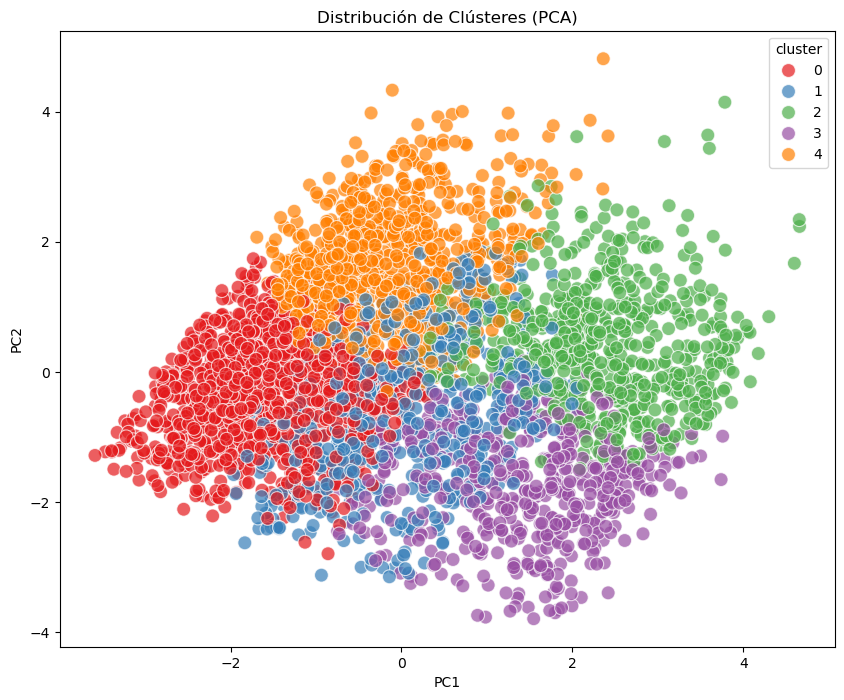

           gender  Near_Location   Partner  Promo_friends     Phone  \
cluster                                                               
0        0.484801       0.698363  0.301637       0.007015  0.899454   
1        0.494471       0.947867  0.791469       0.998420  0.906793   
2        0.464396       0.913313  0.766254       0.493808  0.925697   
3        0.547794       0.937500  0.742647       0.424632  0.863971   
4        0.568233       0.878076  0.178971       0.048098  0.914989   

         Contract_period  Group_visits        Age  \
cluster                                             
0               1.733437      0.255651  28.074825   
1               2.740916      0.431280  28.903633   
2              10.495356      0.506192  30.091331   
3              11.194853      0.575368  29.720588   
4               2.120805      0.456376  29.993289   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster                                                 

In [47]:
# VISUALIZACION DEL ANALISIS DE CLUSTERES Y TASA DEL CHURN


# Visualización de los clústeres en dos dimensiones usando PCA (para reducir dimensiones)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clu_sc)

# Crear un DataFrame con las 2 componentes principales y el clúster asignado
gym_df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
gym_df_pca['cluster'] = gym_df['cluster']

# Visualizar los clústeres
plt.figure(figsize=(10, 8))
sns.scatterplot(data=gym_df_pca, x='PC1', y='PC2', hue='cluster', palette="Set1", s=100, alpha=0.7)
plt.title('Distribución de Clústeres (PCA)')
plt.show()

# Promedio de las características por cada clúster
cluster_profile = gym_df.groupby('cluster').mean(numeric_only=True)
print(cluster_profile)


In [48]:
# TASA DE CHURN POR CLUSTER

# Calcular la tasa de churn por cada clúster
churn_rate_by_cluster = gym_df.groupby("cluster")["Churn"].mean()

# Mostrar la tasa de churn por clúster
print("Tasa de churn por clúster:")
print(churn_rate_by_cluster)

# Ver las características de cada clúster (promedio de variables)
cluster_profile = gym_df.groupby('cluster').mean(numeric_only=True)
print("\nPerfil promedio por clúster:")
print(cluster_profile)


Tasa de churn por clúster:
cluster
0    0.587685
1    0.285940
2    0.013932
3    0.042279
4    0.105145
Name: Churn, dtype: float64

Perfil promedio por clúster:
           gender  Near_Location   Partner  Promo_friends     Phone  \
cluster                                                               
0        0.484801       0.698363  0.301637       0.007015  0.899454   
1        0.494471       0.947867  0.791469       0.998420  0.906793   
2        0.464396       0.913313  0.766254       0.493808  0.925697   
3        0.547794       0.937500  0.742647       0.424632  0.863971   
4        0.568233       0.878076  0.178971       0.048098  0.914989   

         Contract_period  Group_visits        Age  \
cluster                                             
0               1.733437      0.255651  28.074825   
1               2.740916      0.431280  28.903633   
2              10.495356      0.506192  30.091331   
3              11.194853      0.575368  29.720588   
4               2.120

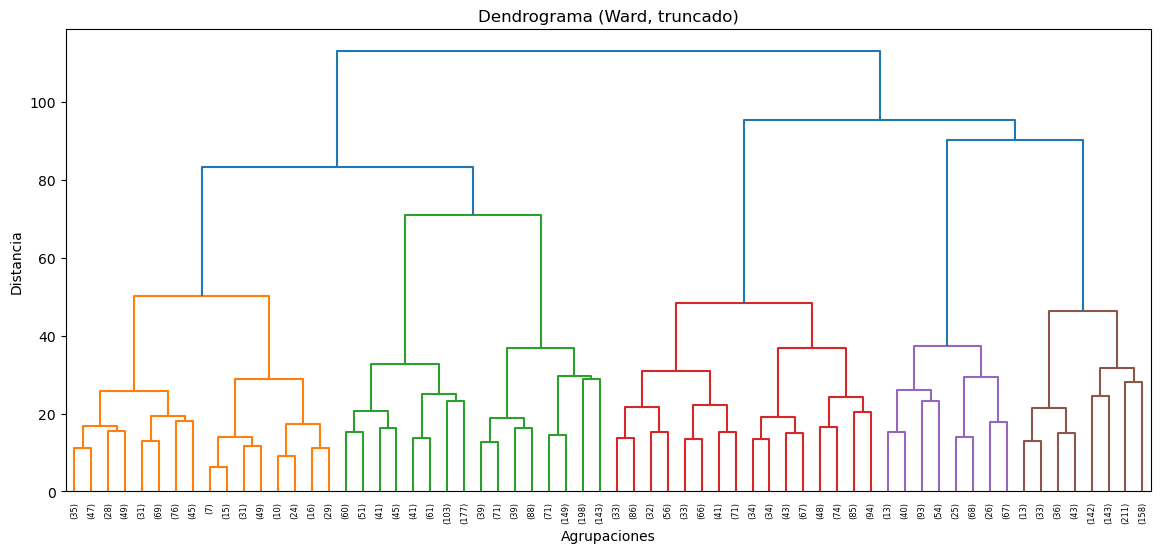

In [31]:

# Asegurarnos de tener la matriz estandarizada del Bloque 4.1
if 'X_clu_sc' not in globals():
    X_clu = gym_df.drop(columns=[TARGET]).copy()
    for c in X_clu.columns:
        if X_clu[c].dtype == 'bool':
            X_clu[c] = X_clu[c].astype(int)
        if X_clu[c].dtype == 'object':
            vals = X_clu[c].dropna().unique()
            if len(vals) == 2:
                X_clu[c] = (X_clu[c] == vals[0]).astype(int)
    scaler = StandardScaler()
    X_clu_sc = scaler.fit_transform(X_clu)

# Enlace jerárquico (Ward)
Z = linkage(X_clu_sc, method="ward")

# Dendrograma truncado para legibilidad
plt.figure(figsize=(14, 6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Dendrograma (Ward, truncado)")
plt.xlabel("Agrupaciones")
plt.ylabel("Distancia")
plt.show()


In [50]:
# --- Bloque 5: Conclusiones y Recomendaciones de Negocio ---
# 1. Resumen de hallazgos clave
print("=== Hallazgos clave ===")
print("1. El Cluster 0 tiene la tasa de churn más alta (58.7%), lo que indica un grupo de alto riesgo.")
print("2. El Cluster 1 tiene la tasa de churn más baja (2.4%), lo que sugiere un grupo muy comprometido.")
print("3. Cluster 2 y 3 tienen tasas de churn moderadas (26% y 26.6%), lo que indica posibles áreas de intervención.")
print("4. La frecuencia de clases y el tiempo de contrato son factores clave para la retención.")
print("5. El promedio de cargos adicionales es alto en los clústeres con churn alto.")

# 2. Recomendaciones para cada clúster
print("\n=== Recomendaciones de negocio ===")

# Cluster 0: Alto churn
print("\nRecomendaciones para Cluster 0 (alto churn):")
print("1. Ofrecer incentivos para la renovación de contrato, como descuentos por 3-6 meses.")
print("2. Promover más clases grupales o actividades para aumentar el compromiso.")
print("3. Lanzar campañas para aumentar la percepción de valor, como promociones en servicios adicionales.")
print("4. Mejorar la interacción con el cliente para entender sus razones de cancelación.")

# Cluster 1: Bajo churn
print("\nRecomendaciones para Cluster 1 (bajo churn):")
print("1. Recompensar su lealtad con programas de referidos o descuentos exclusivos.")
print("2. Ofrecer upgrades o beneficios adicionales para seguir fortaleciendo la relación.")
print("3. Asegurarse de que continúen con su alta participación en clases y actividades.")
print("4. Realizar encuestas periódicas para obtener su retroalimentación.")

# Cluster 2: Churn moderado
print("\nRecomendaciones para Cluster 2 (churn moderado):")
print("1. Ofrecer programas personalizados de fidelización, adaptados a su frecuencia de clases.")
print("2. Enviar recordatorios sobre los beneficios de continuar su membresía y las promociones disponibles.")
print("3. Implementar un sistema de seguimiento activo para detectar señales de desinterés.")
print("4. Brindar ofertas especiales para usuarios que aún no han renovado su contrato.")

# Cluster 3 y 4: Churn moderado
print("\nRecomendaciones para Cluster 3 y 4 (churn moderado):")
print("1. Ofrecer planes de contrato más largos con tarifas de descuento para fomentar la fidelización.")
print("2. Aumentar las promociones para servicios adicionales y descuentos en clases grupales.")
print("3. Realizar encuestas de satisfacción para entender mejor sus necesidades y ajustar las ofertas.")


=== Hallazgos clave ===
1. El Cluster 0 tiene la tasa de churn más alta (58.7%), lo que indica un grupo de alto riesgo.
2. El Cluster 1 tiene la tasa de churn más baja (2.4%), lo que sugiere un grupo muy comprometido.
3. Cluster 2 y 3 tienen tasas de churn moderadas (26% y 26.6%), lo que indica posibles áreas de intervención.
4. La frecuencia de clases y el tiempo de contrato son factores clave para la retención.
5. El promedio de cargos adicionales es alto en los clústeres con churn alto.

=== Recomendaciones de negocio ===

Recomendaciones para Cluster 0 (alto churn):
1. Ofrecer incentivos para la renovación de contrato, como descuentos por 3-6 meses.
2. Promover más clases grupales o actividades para aumentar el compromiso.
3. Lanzar campañas para aumentar la percepción de valor, como promociones en servicios adicionales.
4. Mejorar la interacción con el cliente para entender sus razones de cancelación.

Recomendaciones para Cluster 1 (bajo churn):
1. Recompensar su lealtad con prog

# Conclusiones finales:

Segmentación clara de usuarios: A través del análisis de los clústeres, hemos logrado identificar que los usuarios se agrupan en grupos con diferentes niveles de riesgo de churn. Algunos están muy comprometidos, mientras que otros muestran una alta probabilidad de cancelación.

Factores determinantes: Las variables clave que más afectan al churn son la frecuencia de clases, la duración del contrato y los cargos adicionales. Los usuarios con menos participación en clases y contratos más cortos tienen mayor probabilidad de abandonar.

Prioridad para la retención: El Cluster 0 (con una tasa de churn del 58.7%) es el grupo que requiere atención urgente. Los usuarios con contratos más cortos y menor interacción son los más vulnerables.

## Recomendaciones de negocio:

#### Para Cluster 0 (alto churn):

Ofrecer descuentos por renovación de contrato a largo plazo (por ejemplo, 6-12 meses).

Promover más clases grupales para aumentar la interacción y el sentido de comunidad.

Desarrollar campañas de valor, mostrando más claramente los beneficios del gimnasio y sus servicios adicionales.

#### Para Cluster 1 (bajo churn):

Recompensar la lealtad con promociones exclusivas y ofertas personalizadas.

Ofrecer ventajas por referir amigos y mantener su nivel de participación.

#### Para Cluster 2 y 3 (churn moderado):

Crear programas de fidelización personalizados con beneficios adaptados a sus necesidades específicas.

Enviar recordatorios y ofertas exclusivas para incentivar su renovación antes de que termine su contrato.

## Estrategias generales:

Segmentar campañas de marketing según el riesgo de churn, asegurando que los usuarios con mayor probabilidad de abandonar reciban atención prioritaria.

Monitorear la actividad de los usuarios y realizar un seguimiento personalizado para detectar posibles señales de desinterés, antes de que sea demasiado tarde.